## 爬蟲進階與數據分析

搜尋順序 doc > xhr > js > all

配合網址：https://www.slideshare.net/PaulChao/20170430-python

## 半導體業

In [1]:
import requests

url = "http://mops.twse.com.tw/mops/web/ajax_t163sb19"
payload={
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'24',
'year':'105',
'season':'01'
}



res = requests.post(url,data=payload)

## 抓取多季別

In [2]:
res.text

'\r\n\r\n<html>\r\n<head>\r\n\t<title>å\x85¬é\x96\x8bè³\x87è¨\x8aè§\x80æ¸¬ç«\x99</title>\r\n<!--\t<link href="css/css1.css" rel="stylesheet" type="text/css" Media="Screen"/> -->\r\n<!--\t<script type="text/javascript" src="js/mops1.js"></script> -->\r\n</head>\r\n\r\n<body>\r\n<h2 align=\'center\'><font color=\'blue\'>å\x90\x84ç\x94¢æ¥\xadEPSçµ±è¨\x88è³\x87è¨\x8a</font></h2>\n<h3 align=\'right\'>å\x96®ä½\x8d:æ\x96°å\x8f°å¹£ä»\x9få\x85\x83</h3>\n<table class=\'hasBorder\'>\n<tr>\n<th class=\'tblHead\'>å\x85¬å\x8f¸ä»£è\x99\x9f</th>\n<th class=\'tblHead\'>å\x85¬å\x8f¸å\x90\x8dç¨±</th>\n<th class=\'tblHead\'>ç\x94¢æ¥\xadå\x88¥</th>\n<th class=\'tblHead\'>å\x9fºæ\x9c¬æ¯\x8fè\x82¡ç\x9b\x88é¤\x98(å\x85\x83)</th>\n<th class=\'tblHead\'>æ\x99®é\x80\x9aè\x82¡æ¯\x8fè\x82¡é\x9d¢é¡\x8d</th>\n<th class=\'tblHead\'>ç\x87\x9fæ¥\xadæ\x94¶å\x85¥</th>\n<th class=\'tblHead\'>ç\x87\x9fæ¥\xadå\x88©ç\x9b\x8a</th>\n<th class=\'tblHead\'>ç\x87\x9fæ¥\xadå¤\x96æ\x94¶å\x85¥å\x8f\x8aæ\x94¯å\x87º</th>\n<th class=\'

## 修改網頁編碼

In [3]:
res.encoding#查看目前編碼
res.encoding='utf-8'#修改編碼

In [4]:
res.text

'\r\n\r\n<html>\r\n<head>\r\n\t<title>公開資訊觀測站</title>\r\n<!--\t<link href="css/css1.css" rel="stylesheet" type="text/css" Media="Screen"/> -->\r\n<!--\t<script type="text/javascript" src="js/mops1.js"></script> -->\r\n</head>\r\n\r\n<body>\r\n<h2 align=\'center\'><font color=\'blue\'>各產業EPS統計資訊</font></h2>\n<h3 align=\'right\'>單位:新台幣仟元</h3>\n<table class=\'hasBorder\'>\n<tr>\n<th class=\'tblHead\'>公司代號</th>\n<th class=\'tblHead\'>公司名稱</th>\n<th class=\'tblHead\'>產業別</th>\n<th class=\'tblHead\'>基本每股盈餘(元)</th>\n<th class=\'tblHead\'>普通股每股面額</th>\n<th class=\'tblHead\'>營業收入</th>\n<th class=\'tblHead\'>營業利益</th>\n<th class=\'tblHead\'>營業外收入及支出</th>\n<th class=\'tblHead\'>稅後淨利</th>\n</tr>\n<tr><td class=\'odd\' align=\'center\'>6415</td><td class=\'odd\' align=\'center\'>矽力杰股份有限公司</td><td class=\'odd\' align=\'center\'>半導體業</td><td class=\'odd\' align=\'center\'>                  3.09</td><td class=\'odd\' align=\'center\'>新台幣                 10.0000元</td><td class=\'odd\' align=\'right\'> 

## 抓取全部上市公司

In [73]:
# import requests

# url = "http://mops.twse.com.tw/mops/web/ajax_t163sb19"
# payload={
# 'encodeURIComponent':'1',
# 'step':'1',
# 'firstin':'1',
# 'TYPEK':'sii',
# 'code':'',    
# 'year':'105',
# 'season':'01'
# }



# res = requests.post(url,data=payload)
# res.encoding='utf-8'#修改編碼
# dfs = pandas.read_html(res.text,header=0)

# dfall = []
# for stockdf in dfs:
    
#     stockdf = stockdf[stockdf['公司代號'].str.match('^[0-9]')]
#     dfall.append(stockdf)
# stockdf = dfs[0]


# pandas.concat(dfall,ignore_index=True)

## pandas讀資料

In [5]:
import pandas
dfs = pandas.read_html(res.text)
type(dfs)

list

In [6]:
dfs[0]

,0,1,2,3,4,5,6,7,8
0,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
1,6415,矽力杰股份有限公司,半導體業,3.09,新台幣 10.0000元,1317347,234500,14642,238548
2,基本每股盈餘大於3元,計1家,3.09,NaN,NaN,NaN,NaN,NaN,NaN
3,2454,聯發科技股份有限公司,半導體業,2.79,新台幣 10.0000元,55905486,4403092,875095,4472987
4,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361,70467314,1788585,64792597
5,6531,愛普科技股份有限公司,半導體業,2.05,新台幣 10.0000元,722375,180637,-26658,127416
6,6451,訊芯科技控股股份有限公司,半導體業,2.04,新台幣 10.0000元,973206,181939,69801,215624
7,3034,聯詠科技股份有限公司,半導體業,2.01,新台幣 10.0000元,10970044,1419021,-25197,1221237
8,基本每股盈餘2至3元,計5家,2.28,NaN,NaN,NaN,NaN,NaN,NaN
9,8016,矽創電子股份有限公司,半導體業,1.97,新台幣 10.0000元,2293837,310083,-9115,242994


In [7]:
stockdf = dfs[0]
type(stockdf)

pandas.core.frame.DataFrame

In [8]:
stockdf.columns#看欄位名稱

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [12]:
dfs = pandas.read_html(res.text,header=0)
dfs[0]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,6415,矽力杰股份有限公司,半導體業,3.09,新台幣 10.0000元,1317347.0,234500.0,14642.0,238548.0
1,基本每股盈餘大於3元,計1家,3.09,NaN,NaN,NaN,NaN,NaN,NaN
2,2454,聯發科技股份有限公司,半導體業,2.79,新台幣 10.0000元,55905486.0,4403092.0,875095.0,4472987.0
3,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,70467314.0,1788585.0,64792597.0
4,6531,愛普科技股份有限公司,半導體業,2.05,新台幣 10.0000元,722375.0,180637.0,-26658.0,127416.0
5,6451,訊芯科技控股股份有限公司,半導體業,2.04,新台幣 10.0000元,973206.0,181939.0,69801.0,215624.0
6,3034,聯詠科技股份有限公司,半導體業,2.01,新台幣 10.0000元,10970044.0,1419021.0,-25197.0,1221237.0
7,基本每股盈餘2至3元,計5家,2.28,NaN,NaN,NaN,NaN,NaN,NaN
8,8016,矽創電子股份有限公司,半導體業,1.97,新台幣 10.0000元,2293837.0,310083.0,-9115.0,242994.0
9,2451,創見資訊股份有限公司,半導體業,1.45,新台幣 10.0000元,5648007.0,837899.0,-151703.0,623398.0


In [13]:
stockdf = dfs[0]
stockdf.columns

Index(['公司代號', '公司名稱', '產業別', '基本每股盈餘(元)', '普通股每股面額', '營業收入', '營業利益',
       '營業外收入及支出', '稅後淨利'],
      dtype='object')

## 去除非數字欄位（‘取公司代號’）

In [14]:
stockdf['公司代號']

0           6415
1     基本每股盈餘大於3元
2           2454
3           2330
4           6531
5           6451
6           3034
7     基本每股盈餘2至3元
8           8016
9           2451
10          6525
11          6271
12          6239
13          3443
14          2379
15          3189
16          3413
17          5269
18          3583
19          8081
20    基本每股盈餘1至2元
21          3519
22          2441
23          2351
24          6202
25          4952
26          2408
27          3579
28          8271
29          8131
         ...    
49          2344
50          3094
51          3054
52          3532
53          5471
54          3661
55          2388
56          8261
57          2436
58          5305
59          3016
60          2302
61          2369
62          2303
63          2401
64    基本每股盈餘0至1元
65          2363
66          3041
67          3536
68          8110
69          2338
70          3686
71          2337
72          2342
73          6243
74          3545
75          2434
76          65

In [16]:
#檢查是否包含特定文字
stockdf['公司代號'].str.contains('基本')

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64     True
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77     True
78    False
Name: 公司代號, dtype: bool

In [17]:
#match與許使用正規表達式檢查
stockdf['公司代號'].str.match('^[0-9]')

0      True
1     False
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
      ...  
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57     True
58     True
59     True
60     True
61     True
62     True
63     True
64    False
65     True
66     True
67     True
68     True
69     True
70     True
71     True
72     True
73     True
74     True
75     True
76     True
77    False
78    False
Name: 公司代號, dtype: bool

## 正規表達式

In [22]:
import re
a='3'
re.search('3',a)
re.search('4',a)
re.search('[0-9]',a)#比對0-9數字
re.search('\d',a)#比對0-9數字

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [25]:
a='q'
re.search('[a-z]',a)#比對a-z

a='Q'
re.search('[a-zA-Z]',a)#比對A-Z

a='5'
re.search('[\w]',a)#比對A-Z+a-z+0-9


<_sre.SRE_Match object; span=(0, 1), match='5'>

In [26]:
a='apple'
re.search('\w{5}',a)#比對5個字
re.search('\w{3,8}',a)#比對3到8個字
re.search('\w{0,}',a)#比對0以上
re.search('\w*',a)#比對0以上
re.search('\w{1,}',a)#比對1以上
re.search('\w+',a)#比對1以上

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [27]:
list_p = ['0988333123','0944111111','0933-234-123','0988-222111']
for phone in list_p:
    
#     m=re.search('\d(4)-?\d(3)-?\d(3)',phone)#?={0,1}
#     m=re.search('^\d(4)-?\d(3)-?\d(3)',phone)#^數字開頭
    m=re.search('^\d(4)-?\d(3)-?\d(3)$',phone)#^數字結尾
    print(m)
    

In [33]:
stockdf['公司代號'].str.match('^[0-9]')
stockdf[stockdf['公司代號'].str.match('^[0-9]')]#取得只有公司的代碼
stockdf=stockdf[stockdf['公司代號'].str.match('^[0-9]')]

In [30]:
stockdf.info()#看基本資訊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
公司代號         79 non-null object
公司名稱         79 non-null object
產業別          79 non-null object
基本每股盈餘(元)    73 non-null float64
普通股每股面額      73 non-null object
營業收入         73 non-null float64
營業利益         73 non-null float64
營業外收入及支出     73 non-null float64
稅後淨利         73 non-null float64
dtypes: float64(5), object(4)
memory usage: 5.6+ KB


## 數據分析

## 取得輪廓

In [31]:
stockdf.describe()

,基本每股盈餘(元),營業收入,營業利益,營業外收入及支出,稅後淨利
count,73.000000,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01
mean,0.585753,7.185029e+06,1.320351e+06,3.074164e+04,1.190148e+06
std,0.753344,2.555958e+07,8.254000e+06,2.645050e+05,7.588865e+06
min,-0.610000,3.358900e+04,-8.053240e+05,-7.877980e+05,-8.907870e+05
25%,0.080000,4.521920e+05,1.404300e+04,-1.425300e+04,1.818700e+04
50%,0.400000,1.331500e+06,9.677800e+04,-1.805000e+03,7.918000e+04
75%,0.940000,3.165789e+06,3.100830e+05,1.003200e+04,2.385480e+05
max,3.090000,2.034954e+08,7.046731e+07,1.788585e+06,6.479260e+07


In [34]:
stockdf['營業收入']

0       1317347.0
2      55905486.0
3     203495361.0
4        722375.0
5        973206.0
6      10970044.0
8       2293837.0
9       5648007.0
10       717793.0
11      1916650.0
12     10618124.0
13      2220117.0
14      8987184.0
15      5370156.0
16      2342996.0
17       414919.0
18       922063.0
19       846382.0
21      5269484.0
22      2473026.0
23      2061215.0
24       908086.0
25       684290.0
26     10397555.0
27      5343923.0
28      1499464.0
29      2167035.0
30     62371082.0
31       272830.0
32      2051215.0
         ...     
46      1543657.0
47      4056851.0
48      1399790.0
49     10086944.0
50        80758.0
51        39912.0
52      2535917.0
53       618610.0
54       949373.0
55      1189150.0
56       335264.0
57       442015.0
58      2348403.0
59       671320.0
60       126865.0
61      1331500.0
62     34404079.0
63      1802171.0
65        45643.0
66       981736.0
67       235032.0
68      1865063.0
69       297753.0
70       452192.0
71      50

In [35]:
stockdf['營業收入']==stockdf['營業收入'].max()

0     False
2     False
3      True
4     False
5     False
6     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
      ...  
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
Name: 營業收入, dtype: bool

In [36]:
stockdf[stockdf['營業收入']==stockdf['營業收入'].max()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
3,2330,台灣積體電路製造股份有限公司,半導體業,2.5,新台幣 10.0000元,203495361.0,70467314.0,1788585.0,64792597.0


In [39]:
stockdf[stockdf['營業收入']==stockdf['營業收入'].min()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
76,6533,晶心科技股份有限公司,半導體業,-0.61,新台幣 10.0000元,33589.0,-24086.0,2596.0,-22053.0


In [42]:
stockdf.sort_values('營業收入')#由小到大排序
stockdf.sort_values('營業收入').head(3)#取前三

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
76,6533,晶心科技股份有限公司,半導體業,-0.61,新台幣 10.0000元,33589.0,-24086.0,2596.0,-22053.0
51,3054,立萬利創新股份有限公司,半導體業,0.21,新台幣 10.0000元,39912.0,-6253.0,29205.0,22141.0
65,2363,矽統科技股份有限公司,半導體業,-0.09,新台幣 10.0000元,45643.0,-70913.0,18338.0,-52575.0


In [45]:
stockdf.sort_values('營業收入',ascending=False)#由大到小排序
stockdf.sort_values('營業收入',ascending=False).head(3)#取前三

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
3,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,70467314.0,1788585.0,64792597.0
30,2311,日月光半導體製造股份有限公司,半導體業,0.54,新台幣 10.0000元,62371082.0,5206029.0,449810.0,4337596.0
2,2454,聯發科技股份有限公司,半導體業,2.79,新台幣 10.0000元,55905486.0,4403092.0,875095.0,4472987.0


## 抓取全部上市公司

In [77]:
import requests

url = "http://mops.twse.com.tw/mops/web/ajax_t163sb19"
payload={
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'',    
'year':'105',
'season':'01'
}



res = requests.post(url,data=payload)
res.encoding='utf-8'#修改編碼
dfs = pandas.read_html(res.text,header=0)

dfall = []
for stockdf in dfs:
    
    stockdf = stockdf[stockdf['公司代號'].str.match('^[0-9]')]
    dfall.append(stockdf)
stockdf = dfs[0]


pandas.concat(dfall,ignore_index=True)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1104,環球水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,1105803.0,31658,311221,342983.0
1,1108,幸福水泥股份有限公司,水泥工業,0.26,新台幣 10.0000元,995636.0,133019,-6225,104371.0
2,1110,東南水泥股份有限公司,水泥工業,0.21,新台幣 10.0000元,383670.0,15784,181488,216613.0
3,1101,台灣水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,17724112.0,483889,-206042,94527.0
4,1102,亞洲水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,13038960.0,406252,-123702,194459.0
5,1109,信大水泥股份有限公司,水泥工業,-0.03,新台幣 10.0000元,875999.0,-26416,-162,-33204.0
6,1103,嘉新水泥股份有限公司,水泥工業,-0.29,新台幣 10.0000元,541218.0,-91274,-100254,-188985.0
7,1256,鮮活控股股份有限公司,食品工業,1.44,新台幣 10.0000元,535660.0,58197,5579,39253.0
8,1235,興泰實業股份有限公司,食品工業,1.42,新台幣 10.0000元,19119.0,2839,81683,83417.0
9,1702,南僑化學工業股份有限公司,食品工業,1.16,新台幣 10.0000元,3715766.0,449614,-25862,277797.0


In [78]:
stockdf=pandas.concat(dfall,ignore_index=True)

Populating the interactive namespace from numpy and matplotlib


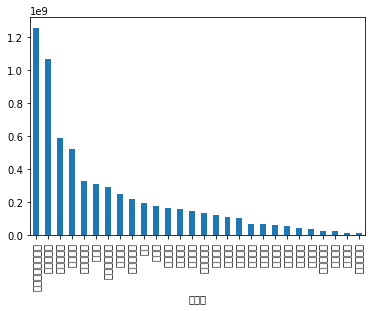

In [79]:
revenue_sum = stockdf.groupby('產業別')['營業收入'].sum().sort_values(ascending=False)
% pylab inline


revenue_sum.plot(kind='bar')

In [80]:
revenue_sum

產業別
電腦及週邊設備業    1.258632e+09
其他電子業       1.067066e+09
金融保險業       5.887326e+08
半導體業        5.245071e+08
電子通路業       3.280177e+08
光電業         3.100052e+08
電子零組件業      2.882352e+08
塑膠工業        2.491992e+08
通信網路業       2.201759e+08
其他          1.925858e+08
航運業         1.764076e+08
食品工業        1.646163e+08
貿易百貨        1.560951e+08
鋼鐵工業        1.438673e+08
油電燃氣業       1.347268e+08
紡織纖維        1.216846e+08
電機機械        1.055176e+08
汽車工業        1.027299e+08
建材營造        6.800162e+07
化學工業        6.420342e+07
電器電纜        5.689345e+07
橡膠工業        5.544802e+07
造紙工業        3.833490e+07
水泥工業        3.466540e+07
生技醫療業       2.434520e+07
觀光事業        2.178487e+07
玻璃陶瓷        1.302729e+07
資訊服務業       1.141810e+07
Name: 營業收入, dtype: float64

In [81]:
?revenue_sum.plot

## 多季

In [82]:
import requests

url = "http://mops.twse.com.tw/mops/web/ajax_t163sb19"
payload={
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'24',    
'year':'105',
'season':'01'
}

def getEPS(year,season):
    payload['year']=year
    payload['season']=season
    res = requests.post(url,data=payload)
    res.encoding='utf-8'#修改編碼
    dfs = pandas.read_html(res.text,header=0)

    stockdf = dfs[0]

    stockdf = stockdf[stockdf['公司代號'].str.match('^[0-9]')]
    stockdf['year']=year
    stockdf['season']=season
    return stockdf


df = getEPS('105','01')



//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
df.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,year,season
0,6415,矽力杰股份有限公司,半導體業,3.09,新台幣 10.0000元,1317347.0,234500.0,14642.0,238548.0,105,01
2,2454,聯發科技股份有限公司,半導體業,2.79,新台幣 10.0000元,55905486.0,4403092.0,875095.0,4472987.0,105,01
3,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,70467314.0,1788585.0,64792597.0,105,01
4,6531,愛普科技股份有限公司,半導體業,2.05,新台幣 10.0000元,722375.0,180637.0,-26658.0,127416.0,105,01
5,6451,訊芯科技控股股份有限公司,半導體業,2.04,新台幣 10.0000元,973206.0,181939.0,69801.0,215624.0,105,01


In [ ]:
# dftotal = []
# seasons = ['01','02','03','04']
# for year in range(102,106)
    

## 圖表資料

In [86]:
import requests
res = requests.get("https://statementdog.com/analysis/analysis_ajax/2330/2012/1/2017/4/1?queried_by_user=true&_=1493525063839")
jd = res.json()






In [96]:

data = pandas.DataFrame(jd['11']['data']['month']['data'])
data.columns = ['idx', 'price']
data.head()



,idx,price
0,0,76.4
1,1,78.13
2,2,82.25
3,3,84.28
4,4,83.94


In [97]:
axis = pandas.DataFrame(jd['11']['data']['month']['axis'])
axis.columns = ['idx2', 'yearmonth']
axis.head()

,idx2,yearmonth
0,0,201201
1,1,201202
2,2,201203
3,3,201204
4,4,201205


In [98]:

# axis = 1, concat by columns
stockdf = pandas.concat([axis, data], axis=1)

In [99]:

# get yearmonth and price only
stockdf = stockdf[['yearmonth', 'price']]

In [100]:

# change year month to datetime format, and assign to index
stockdf.index = pandas.to_datetime(stockdf['yearmonth'], format = '%Y%m')

In [101]:
stockdf.head()

,yearmonth,price
yearmonth,,
2012-01-01,201201,76.4
2012-02-01,201202,78.13
2012-03-01,201203,82.25
2012-04-01,201204,84.28
2012-05-01,201205,83.94


In [102]:
# convert type of price from object to float
stockdf['price'] = stockdf['price'].astype(float)

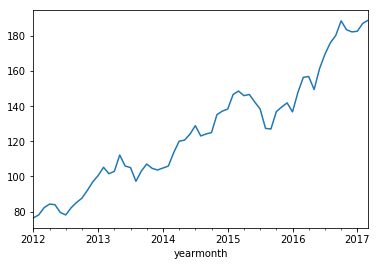

In [103]:
# plot line chart
stockdf['price'].plot(kind = 'line')

In [104]:
stockdf['mvg3']= stockdf['price'].rolling(window= 3).mean()

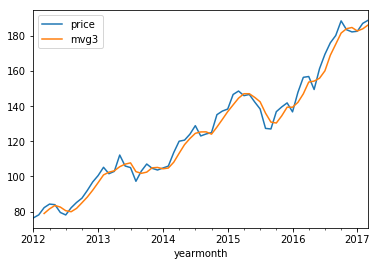

In [105]:
# plot line chart
stockdf[['price', 'mvg3']].plot(kind = 'line')

## 乙太幣資訊

In [106]:
import requests
url = 'https://www.maicoin.com/zh-TW/trade_summaries/eth?from=2016-10-30+12%3A28%3A36+%2B0800'
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',    
'X-CSRF-Token':'DLdAHVRXiB3aHTfMNDhlr0r9SXlzbCty5oZ5dJvBJ8wPHOatI9KO/iuHwhUMhAPOm8wDqv9lpTn86JHc6EVu7g==',
'X-Requested-With':'XMLHttpRequest',
'Cookie':'visid_incap_160122=A4M8eBbASIaPyLW3MJIJYNgCmFgAAAAAQUIPAAAAAAA7/GYrbtr5cmWspDT0H104; incap_ses_406_160122=nZjQBKxLIWmLw8xOwmiiBSms/VgAAAAA0m4czHtPg0qs2V4fifg5GQ==; _okdetect=%7B%22token%22%3A%2214930196967490%22%2C%22proto%22%3A%22https%3A%22%2C%22host%22%3A%22www.maicoin.com%22%7D; _ok=2909-208-10-2973; incap_ses_576_160122=Lih9QmR8Bg+J0R5VIV3+B2Su/VgAAAAAFUCyE9XInLZ6KGqR1t+wHg==; _okac=2dc9c7c45a697160aa9a474371086c3f; _okla=1; _hjIncludedInSample=1; incap_ses_200_160122=lVvIE8D05jIxARGNRIvGAmSC/1gAAAAAUCJpluS0XIucsgAadH2mTw==; _hjMinimizedPolls=50467; last_sign_in_at=2017-04-29+21%3A21%3A21+%2B0800; _okbk=cd4%3Dtrue%2Cvi5%3D0%2Cvi4%3D1493478210836%2Cvi3%3Dactive%2Cvi2%3Dfalse%2Cvi1%3Dfalse%2Ccd8%3Dchat%2Ccd6%3D0%2Ccd5%3Daway%2Ccd3%3Dfalse%2Ccd2%3D0%2Ccd1%3D0%2C; olfsk=olfsk5239368130145221; wcsid=2oAH2ywU6fYUhMzF3Z2JK0H8RE0PPobT; hblid=WFEmWdozZE4GfEAz3Z2JK5u1CH3RE0O6; _oklv=1493479241401%2C2oAH2ywU6fYUhMzF3Z2JK0H8RE0PPobT; incap_ses_627_160122=kATPYGYslUGAuJ/fRI2zCOUNBVkAAAAAeW5uFiLXoEawbI5gCmO29g==; incap_ses_401_160122=VFphQTzanTK4Hanga6SQBa5nBVkAAAAAark7up57FDFpElkuB+YPeg==; locale=InpoLVRXIg%3D%3D--a65135f98901cde92d397aef024641fac25550a3; currency=InR3ZCI%3D--6eec4eff818e386526edfcc1b4af684de0367230; _twcoin_session=RUtHZm9ZdnlXdjhnWjZGVkZVcm1nZC9HU3dVUU9OcTQ4UldSUXhhQTJnb1ZyQnVqSGNJbHo2SHBLUEhYUzFtWEltcEswajJiNE9ueXEwWHNudHVacnVaeTYyS0VjME1hL2hNYjlrQzZNZVRtd25pcUl6NVFUQjBlaW55aTBsaXRJS2VsNFhNUmxOaWpSdENLU0lpZ3hBPT0tLUFYb1FOaXNxczEraFpTUG5nTVRWMFE9PQ%3D%3D--6285e1cd54e1a4dccb638137c0497b2c00f19363; _ga=GA1.2.896472302.1486357208; _gat=1'
}
payload = {'from':'2016-10-30 12:28:36 +0800'}
res = requests.post(url , data = payload, headers = headers)
print(res.text)

$("#chart").empty();

Morris.Area({
  element: "chart",
  data: [{"x":"2016-11-02 00:00","y":"342.35"},{"x":"2016-11-03 00:00","y":"341.40"},{"x":"2016-11-04 00:00","y":"342.20"},{"x":"2016-11-05 00:00","y":"351.96"},{"x":"2016-11-06 00:00","y":"350.89"},{"x":"2016-11-07 00:00","y":"344.94"},{"x":"2016-11-08 00:00","y":"341.71"},{"x":"2016-11-09 00:00","y":"343.87"},{"x":"2016-11-10 00:00","y":"337.64"},{"x":"2016-11-11 00:00","y":"334.62"},{"x":"2016-11-12 00:00","y":"327.15"},{"x":"2016-11-13 00:00","y":"315.71"},{"x":"2016-11-14 00:00","y":"322.95"},{"x":"2016-11-15 00:00","y":"318.64"},{"x":"2016-11-16 00:00","y":"325.84"},{"x":"2016-11-17 00:00","y":"319.66"},{"x":"2016-11-18 00:00","y":"318.38"},{"x":"2016-11-19 00:00","y":"304.78"},{"x":"2016-11-20 00:00","y":"310.21"},{"x":"2016-11-21 00:00","y":"305.48"},{"x":"2016-11-22 00:00","y":"306.10"},{"x":"2016-11-23 00:00","y":"314.58"},{"x":"2016-11-24 00:00","y":"312.73"},{"x":"2016-11-25 00:00","y":"292.47"},{"x":"2016-11-26 00:00"

In [107]:
import re
m = re.search('data: \[(.+)?\],', res.text)
m2 = eval(m.group(0).strip('data: ').strip(','))

In [108]:
df = pandas.DataFrame(m2)
df.index = df['x']
df['y'] = df['y'].astype(float)

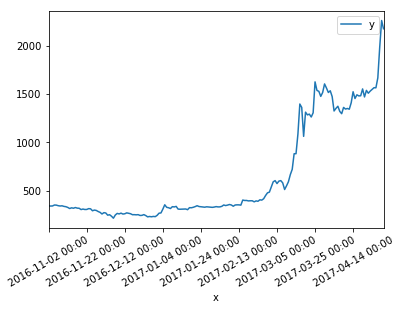

In [109]:
df.plot(kind='line',rot=30)

In [110]:
df['mvg7']= df['y'].rolling(window= 7).mean()

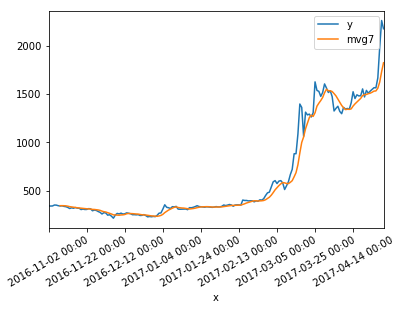

In [111]:
df[['y', 'mvg7']].plot(kind= 'line', rot=30)